# 1/2オーバーラップでFFTしてIFFTして元に戻す処理

https://qiita.com/wrist/items/5759f894303e4364ebfd

In [2]:
import sys

import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt

import soundfile as sf

OSError: sndfile library not found<br>
http://1000neta.blogspot.com/2018/01/dockerubuntusndfile.html<br>
apt-get install libsndfile1<br>

In [4]:
plt.close("all")

# wavファイル読み込み
filename = 'byosyun_no_kou_tadas_guitar1.aif'
wav, fs = sf.read(filename)

In [5]:
# ステレオ2chの場合、LchとRchに分割
wav_l = wav[:, 0]
wav_r = wav[:, 1]

In [6]:
# 入力をモノラル化
xs = (0.5 * wav_l) + (0.5 * wav_r)

In [8]:
n_len = len(xs)
n_fft = 128
n_overlap = 2
n_shift = n_fft / n_overlap

In [9]:
# 中間バッファ
zs = np.zeros(n_len)
Zs = np.zeros(n_fft)

In [10]:
# 出力バッファ
ys = np.zeros(n_len)

In [11]:
# 窓関数
window = np.hanning(n_fft)

In [28]:
# FFT & IFFT
for start in range(0, int(n_len - n_shift), int(n_shift)):
    #print(start)
    xs_cut = xs[start: start + n_fft]
    xs_win = xs_cut * window
    Xs = fft.fft(xs_win, n_fft)

    # some signal processing
    Zs = Xs
    zs = fft.ifft(Zs, n_fft)

    # write output buffer
    ys[start: start + n_fft] += np.real(zs)

ValueError: operands could not be broadcast together with shapes (101,) (128,) 

```---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-19-de146af656cf> in <module>()
      3     print(start)
      4     xs_cut = xs[start: start + n_fft]
----> 5     xs_win = xs_cut * window
      6     Xs = fft.fft(xs_win, n_fft)
      7 

ValueError: operands could not be broadcast together with shapes (101,) (128,) 
```

In [22]:
len(xs_cut)

101

In [23]:
len(window)

128

In [29]:
# FFT & IFFT
for start in range(0, int(n_len - n_shift), int(n_shift)):
    #print(start)
    xs_cut = xs[start: start + n_fft]
    if len(xs_win) == len(xs_cut):
        xs_win = xs_cut * window
    else:
        break
    Xs = fft.fft(xs_win, n_fft)

    # some signal processing
    Zs = Xs
    zs = fft.ifft(Zs, n_fft)

    # write output buffer
    ys[start: start + n_fft] += np.real(zs)

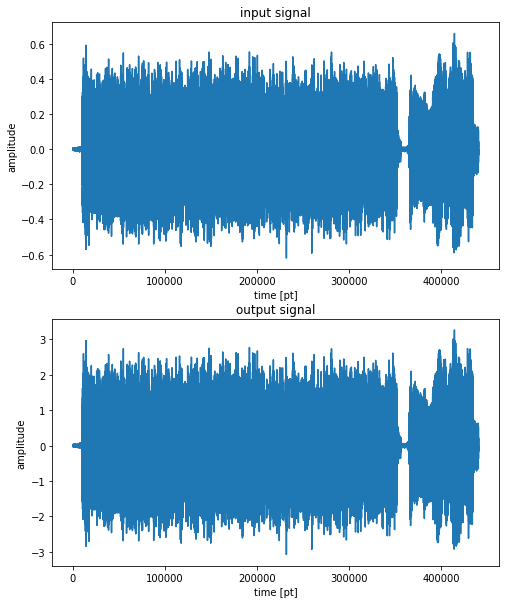

In [32]:
# 冒頭から10秒分プロット
fig = plt.figure(1, figsize=(8, 10))
ax = fig.add_subplot(211)
ax.plot(xs[:fs*10])
ax.set_title("input signal")
ax.set_xlabel("time [pt]")
ax.set_ylabel("amplitude")

ax = fig.add_subplot(212)
ax.plot(ys[:fs*10])
ax.set_title("output signal")
ax.set_xlabel("time [pt]")
ax.set_ylabel("amplitude")

plt.show()